## Importing Library And Data

In [1]:
# import the library
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the datasets
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Data Cleaning

In [3]:
# data dimenssion check
print('Dimenssion:', crime_data.shape)

Dimenssion: (50, 5)


- Data have total 50 Rows and 5 Columns

In [4]:
# check the dataframes information 
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Places      50 non-null object
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


- Places feature have string values of type object (Categorical data)
- Murder feature have fraction values of type foat64
- Apart from above have numeric values of type int64

In [5]:
# basic data statistics check
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


- Murder: Muder rates in different places of United States
- Assualt: Assualt rate in different places of United States
- UrbanPop: urban population in different places of United States
- Rape: Rape rate in different places of United States


- Need to scale the data or normalization form

In [6]:
# null values check
crime_data.isnull().sum()

Places      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

- Total null values count = 0

In [7]:
# dublicate entry check
print('Dublicate entry counts:', crime_data.duplicated().sum())

Dublicate entry counts: 0


- No dublicate data is found
- No null data is found
- One Categorical data is found
- Missing values are 0

## Normalizing Data

In [8]:
from sklearn.preprocessing import MinMaxScaler

features_selected = crime_data.iloc[:, 1:]
scalar = MinMaxScaler()
scalar.fit(features_selected)
X33 = scalar.transform(features_selected)
X33

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [9]:
# check the type of array having normalized values
type(X33)

numpy.ndarray

In [10]:
# convert the numpy array to dataFrame again
panda_df = pd.DataFrame(data = X33, columns = ["Murder", "Assault", "UrbanPop", "Rape"]) 
print(type(panda_df))
panda_df.head()

<class 'pandas.core.frame.DataFrame'>


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Part 1 - Hirarchical Clustering

## Data Visualization and Explore

- For Hirarchical Cluster, we use dendrogram for data visualization analysis
- Below are the methods for distance calulation and dendrogram picture                
        1) Single
        2) Centrid
        3) Complete
        4) Average
        5) Ward

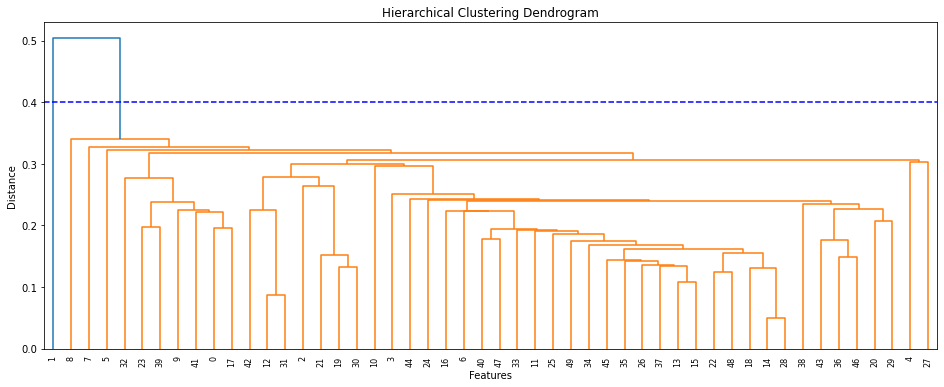

In [11]:
# create dendogram (Single method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(X33, method = 'single'))
plt.axhline(y = 0.4, color = 'b', linestyle = '--')
plt.show()

- By using single linkage method, dendrogram structure is divided into 2 parts of section
- Blue (1),Orange (15, 41, 24, 48, etc)
- So, 2 hirarchical clusters are formed depending on similarities in group

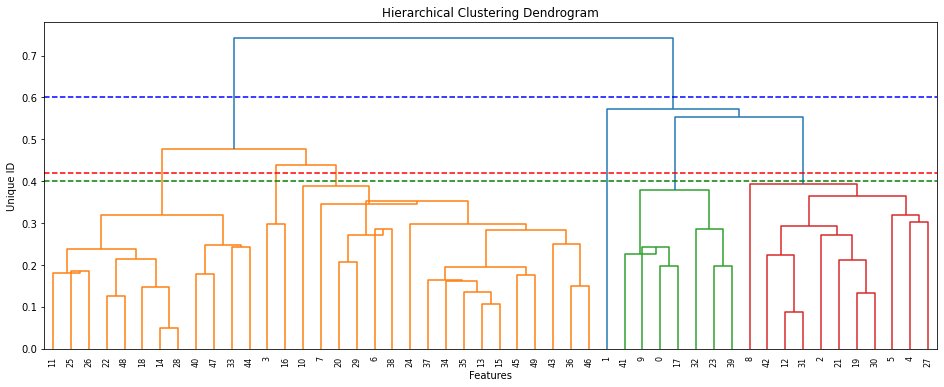

In [12]:
# create dendogram (Centroid method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Unique ID')
dendogram = sch.dendrogram(sch.linkage(X33, method = 'centroid'))
plt.axhline(y = 0.6, color = 'b', linestyle = '--')
plt.axhline(y = 0.4, color = 'g', linestyle = '--')
plt.axhline(y = 0.42, color = 'r', linestyle = '--')
plt.show()

- By using centroid method, dendrogram structure is divided into 4 parts of section
- Blue (1). Green (14, 91 17), Red (12, 42, 4) and Orange (11, 25, 26, etc)
- So, 4 hirarchical clusters are formed depending on similarities in group

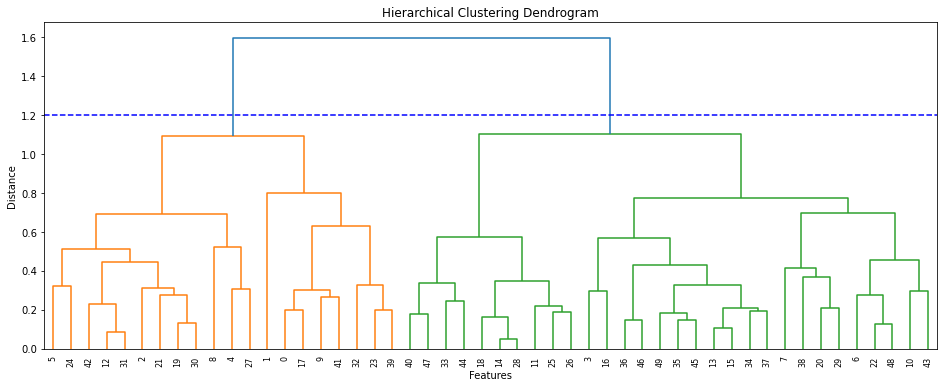

In [13]:
# create dendogram (Complete method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(X33, method = 'complete'))
plt.axhline(y = 1.2, color = 'b', linestyle = '--')
plt.show()

- By using complete method, dendrogram structure is divided into 2 parts of section
- Green (40, 26, 46, 7, etc) and Orange (5, 42, 27, 1, etc)
- So, 2 hirarchical clusters are formed depending on similarities in group

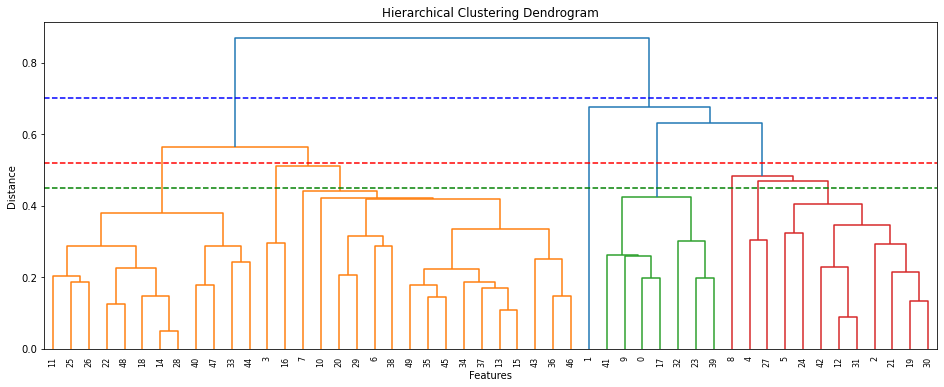

In [14]:
# create dendogram (Average method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(X33, method = 'average'))
plt.axhline(y = 0.7, color = 'b', linestyle = '--')
plt.axhline(y = 0.52, color = 'r', linestyle = '--')
plt.axhline(y = 0.45, color = 'g', linestyle = '--')
plt.show()

- By using average method, dendrogram structure is divided into 4 parts of section
- Blue (1), Green (9, 41, 32, etc), Red (27, 31, 30, etc) and Orange (11, 25, 26, etc)
- So, 4 hirarchical clusters are formed depending on similarities in group

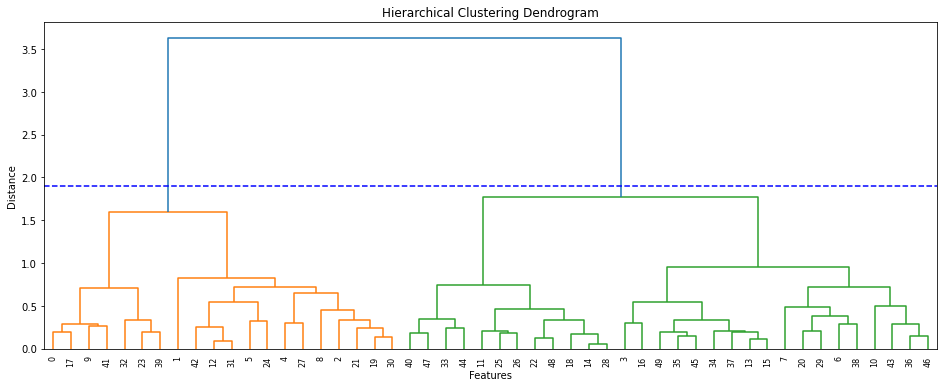

In [15]:
# create dendogram (Ward method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(X33, method = 'ward'))
plt.axhline(y = 1.9, color = 'b', linestyle = '--')
plt.show()

- By using ward method, dendrogram structure is divided into 2 parts of section
- Green (45, 37, 15, etc) and Orange (17, 23, 42, etc)
- So, 2 hirarchical clusters are formed depending on similarities in group of 2 different colors

### Training the Hirarchical Clustering Model

In [16]:
# hc = hirarchical clustering
hirarchical_cluster = AgglomerativeClustering(n_clusters = 3, linkage='ward', affinity = "euclidean")
hirarchical_cluster.fit(X33)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

- Cluster size = 3
- Linkage method = ward
- Distance calulation = euclidean


- And we are fitting the cluster model to "hirarchical_cluster"

In [17]:
# cluster labels (check unique values)
hc_cluster_labels = pd.Series(hirarchical_cluster.labels_)
hc_cluster_labels.unique()

array([0, 1, 2], dtype=int64)

- There are 3 cluster having the labels naming as 0, 1, 2
- 0 refers Cluster 1
- 1 refers Cluster 2
- 2 refers Cluster 3

In [18]:
# create a new column for cluster id "clusterId" and assign labels
crime_data['clusterId'] = hc_cluster_labels
crime_data1 = crime_data.iloc[:,]
crime_data1.head(15)

,Places,Murder,Assault,UrbanPop,Rape,clusterId
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [19]:
# writing csv file with cluster id
crime_data1.to_csv("CrimeClusterData.csv", encoding = "utf-8")

- Write a csv file containing original dataset with Cluster Id

In [20]:
# predict the cluster values
y_hc = hirarchical_cluster.fit_predict(X33)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

## Visualizing The Clusters

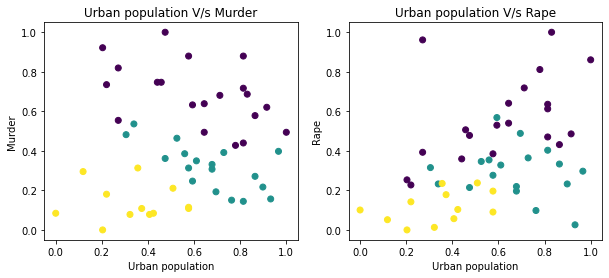

In [21]:
# visualization of scatter plot
plt.figure(figsize = (10,4))

plt.subplot(1, 2, 1)
plt.xlabel('Urban population')  
plt.ylabel('Murder')   
plt.title("Urban population V/s Murder") 
plt.scatter(panda_df['UrbanPop'], panda_df['Murder'], c = hc_cluster_labels)

plt.subplot(1, 2, 2)
plt.xlabel('Urban population')  
plt.ylabel('Rape')   
plt.title("Urban population V/s Rape")  
plt.scatter(panda_df['UrbanPop'], panda_df['Rape'], c = hc_cluster_labels)

- From above scatter plot (Urban Population vs Murder and Rape), we are seeing that the datapoints are scatter among the 3 clusters having  the cluster similarities

# K-Means Clustering

In [22]:
# import the KMeans library
from sklearn.cluster import KMeans

## Calculation of Ineria And Centroid

In [23]:
# calculation of inertia
wscc=[]
for i in range (1,11):
    # fit the K-Means algorith to our data
    kmeans=KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(panda_df)
    
    # Computer the cluster sum of squares and append to WSCC list (with respect to Inertia)
    wscc.append(kmeans.inertia_)

- KMeans args

        1) max_iter : maximum number of iteration there can to be find the final clusters when KMeans algorithm is running
        2) n_init   : the number of times the KMeans algorithm will be run with different initial centroids


## Elbow Curve

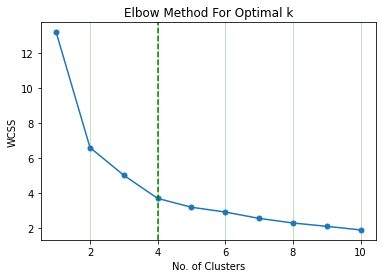

In [24]:
# Visualising elbow method
plt.plot(range(1,11), wscc, marker = 'o', markersize = 5)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.axvline(x = 4, color = 'g', linestyle = '--')
plt.grid(which = 'both', color = 'g', axis = 'x', alpha = 0.3)
plt.show()

- Using elbow method to find the optimal number of clusters
- Elbow curve is smooth after the 4 almost
- Hence, number of optimal clusters = 4

In [25]:
# creating object kmeans of class KMeans()
kmeans = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)

- Computing the KMeans by providing number of clusters = 4 (n_clusters)
- From Elbow method, 4 is the number that we had analysed 

In [26]:
# predicting the cluster values (labels)
y_kmeans = kmeans.fit_predict(panda_df)
y_kmeans

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [36]:
np.unique(y_kmeans)

array([0, 1, 2, 3])

- KMeans Cluster values: 0,1,2,3 ..............  (K=4)

In [27]:
y_kmeans.astype

<function ndarray.astype>

## Silhouette Score

In [39]:
from sklearn.metrics import silhouette_score

# Silhouette Score
print(f'Silhouette Score: {silhouette_score(panda_df, y_kmeans)} .... (K=4)')

Silhouette Score: 0.3349095719865253 .... (K=3)


In [28]:
# converting x into ndarray to avoid errors
X1 = np.array(panda_df)
X1.astype

<function ndarray.astype>

In [29]:
# Centers of the cluster
print(kmeans.cluster_centers_)

[[0.29254518 0.32148973 0.70974576 0.29667313]
 [0.60333642 0.72734457 0.74576271 0.66905188]
 [0.1686747  0.11485774 0.34028683 0.12601868]
 [0.79141566 0.6802226  0.36864407 0.36466408]]


- Center of the clusters

In [30]:
# this will tell us to which cluster down the data observations belongs to
new_label = kmeans.labels_
print(new_label)

[3 1 1 3 1 1 0 0 1 3 0 2 1 0 2 0 2 3 2 1 0 1 2 3 1 2 2 1 2 0 1 1 3 2 0 0 0
 0 0 3 2 3 1 0 2 0 0 2 2 0]


In [31]:
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
features_selected['clusters'] = cluster
features_selected.head(10)

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,4
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,4
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,4


In [32]:
# mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(features_selected.groupby('clusters').mean(), 1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
clusters,,,,
1,5.7,138.9,73.9,18.8
2,10.8,257.4,76.0,33.2
3,3.6,78.5,52.1,12.2
4,13.9,243.6,53.8,21.4


## Visualizing the Clusters

##### Using matplolib (cluster labels:0,1,2,3)

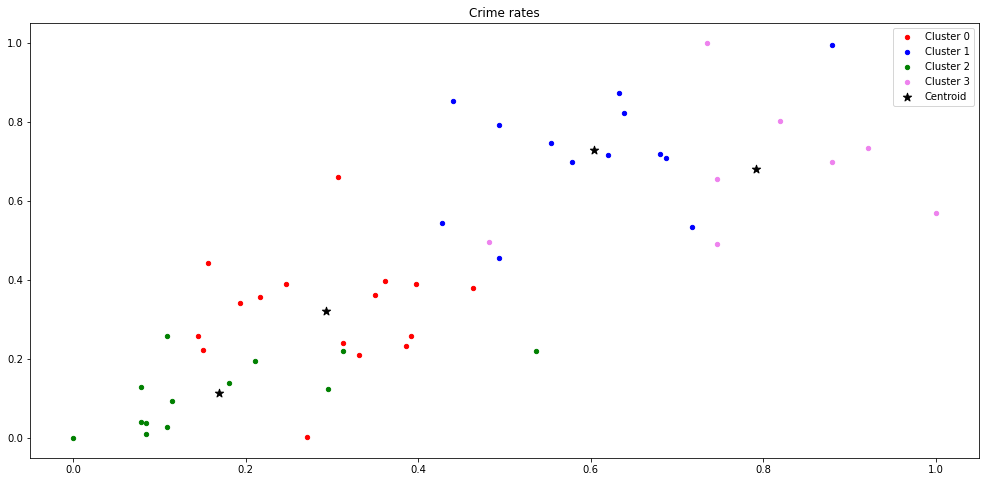

In [33]:
# scatter plot for cluster values 0, 1, 2, 3
fig = plt.figure(figsize=(17, 8))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 75, c = 'red', marker='.', label = 'Cluster 0')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 75, c = 'blue', marker='.', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 75, c = 'green', marker='.',label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 75, c = 'violet', marker='.',label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 75, color='black', marker='*',label='Centroid')
plt.title('Crime rates')
plt.legend()
plt.show()

Text(0.5, 1.0, 'K=4')

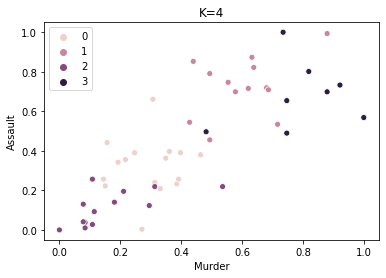

In [42]:
sns.scatterplot(panda_df.Murder, panda_df.Assault, hue = y_kmeans).set_title("K=4")

- Predicting the cluster labels and plot the above scatter plot having 4 different clusters
- Cluster 1 (red), Cluster 2 (blue), Cluster 3 (green), Cluster 4 (pink) and Centroid (black)
- Circular points refers to the datapoints within the perticular clusters based on color
- Star points refers to the centroid for that clusters which is indicated in black color

##### Using seaborn (cluster labels:1,2,3,4)

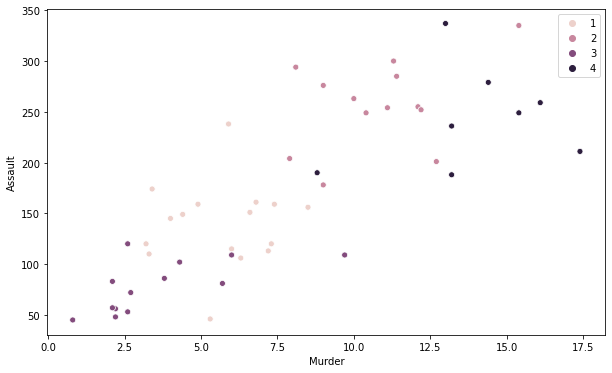

In [34]:
# scatter plot for cluster values 1, 2, 3, 4
plt.figure(figsize = (10,6))
sns.scatterplot(x = features_selected['Murder'], y = features_selected['Assault'], hue = y_kmeans1)

- The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults
- And there is a positive correlation between occurrence of Murder and Assault in different states.